In [1]:
library(Seurat)
library(ggplot2)
library(ggthemes)
library(ggpubr)
library(pheatmap)
library(stringr)
library(RColorBrewer)

#seurat = readRDS('seurat_clustered.RDS')

Warning message:
"package 'Seurat' was built under R version 4.1.3"
Attaching SeuratObject

Attaching sp

Warning message:
"package 'RColorBrewer' was built under R version 4.1.3"


In [2]:
seurat$cluster = seurat$integrated_snn_res.0.5

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


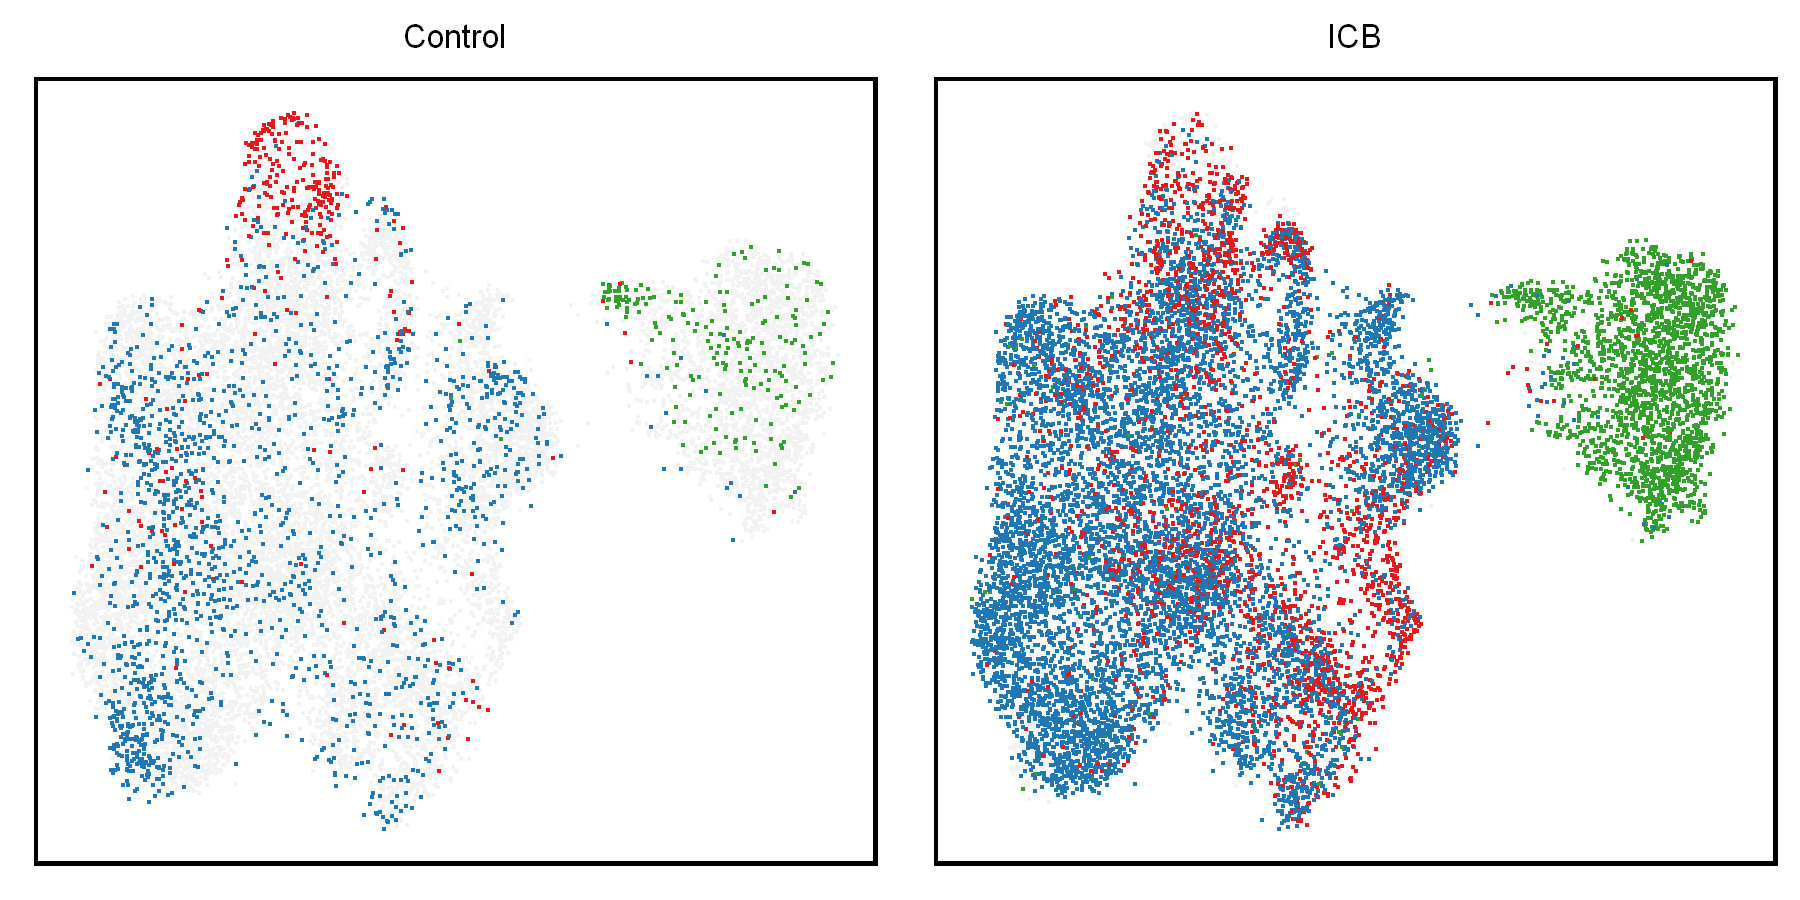

In [7]:
library(RColorBrewer)
options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 300)
source("L:/Duncan/kptumors_figures/figure_parameters.R")
library(ggthemes)
library(dplyr)
seurat$tissue[seurat$tissue == 'dLN']  = 'TdLN'

seurat@meta.data$UMAP1 = Embeddings(seurat, 'umap')[,1]
seurat@meta.data$UMAP2 = Embeddings(seurat, 'umap')[,2]

seurat@meta.data$class = NA
seurat@meta.data$class[seurat@meta.data$letter == 'C'] = 'Control'
seurat@meta.data$class[seurat@meta.data$letter == 'P'] = 'ICB'

seurat@meta.data$class = factor(seurat@meta.data$class, levels = c('Control', 'ICB'))

tissue_palette = brewer.pal(6, 'Paired')[c(2,6,4,2,6,4)]
seurat@meta.data$both = paste0(seurat@meta.data$class, '_', seurat@meta.data$tissue)

names(tissue_palette) = levels(factor(seurat@meta.data$both))

seurat@meta.data$both = paste0(seurat@meta.data$class, '_', seurat@meta.data$tissue)
names(tissue_palette) = levels(factor(seurat@meta.data$both))



g1 = ggplot(seurat@meta.data[sample(rownames(seurat@meta.data)),], aes(x = UMAP1, y = UMAP2)) + geom_point(size = .1, color = 'grey95') + 
geom_point(data = seurat@meta.data[sample(rownames(seurat@meta.data)),] %>% filter(letter == 'C'), mapping = aes( x = UMAP1, y = UMAP2, color = both), size = .1) +
scale_color_manual(values = tissue_palette) + theme_classic() + guides(color = FALSE) + Axis_themes + UMAP_theme + ggtitle('Control')
g2 = ggplot(seurat@meta.data[sample(rownames(seurat@meta.data)),], aes(x = UMAP1, y = UMAP2)) + geom_point(size = .1, color = 'grey95') + 
geom_point(data = seurat@meta.data[sample(rownames(seurat@meta.data)),] %>% filter(letter == 'P'), mapping = aes( x = UMAP1, y = UMAP2, color = both), size = .1) +
scale_color_manual(values = tissue_palette) + theme_classic() + guides(color = FALSE)+ Axis_themes + UMAP_theme + ggtitle('ICB')

cowplot::plot_grid(g1, g2)
ggsave('Atlas/tissue_umaps.pdf', height = 2.1, width = 4, useDingbats = FALSE)

In [11]:
phenotype_palette

Pre-exhausted      Progenitor  Intermediate_1  Intermediate_2     Exhausted_1 
      "#4E79A7"       "#F28E2B"       "#E15759"       "#76B7B2"       "#59A14F" 
    Exhausted_2   Exhausted_KLR  IFN-responsive Proliferating_1 Proliferating_2 
      "#EDC948"       "#B07AA1"       "#FF9DA7"       "#9C755F"       "#BAB0AC"


  Pre-exhausted      Progenitor  Intermediate_1  Intermediate_2     Exhausted_1 
            214            1769            3982            1376            2218 
    Exhausted_2   Exhausted_KLR  IFN-responsive Proliferating_1 Proliferating_2 
            148            1813             502            1429            1224 

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


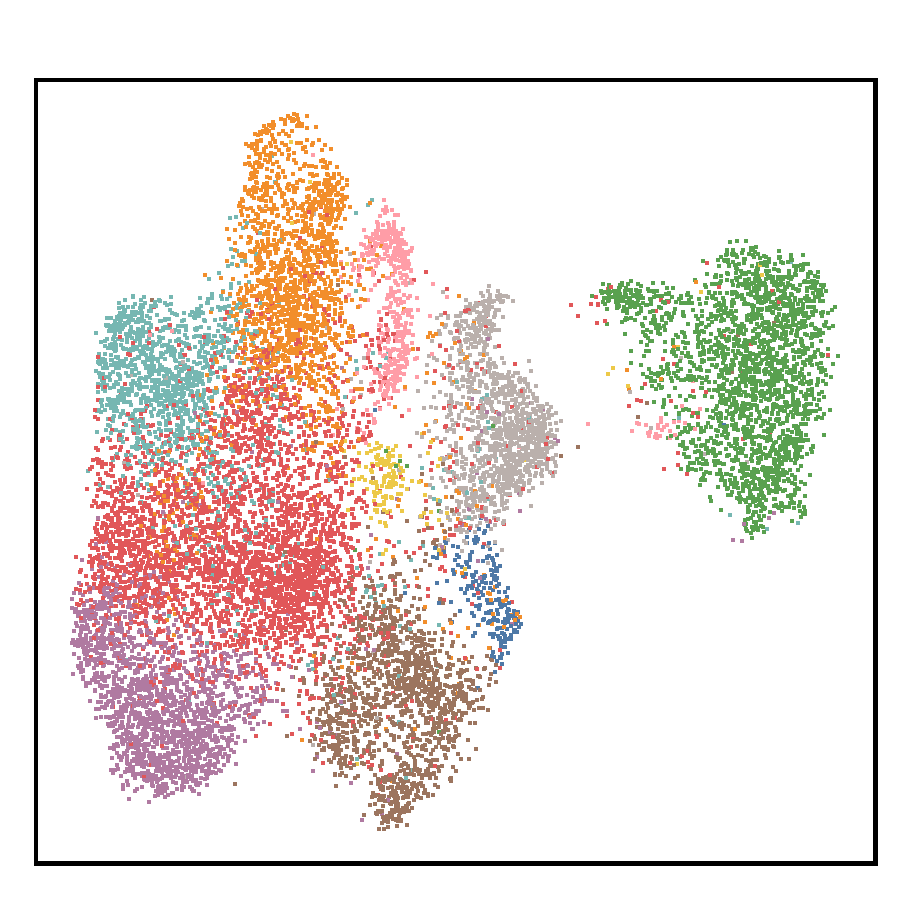

In [9]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res = 300)

cluster_hash = c('Intermediate_1', 'Exhausted_1', 'Exhausted_KLR', 'Progenitor', 'Proliferating_1', 'Intermediate_2', 'Proliferating_2', 'IFN-responsive', 'Pre-exhausted', 'Exhausted_2')
names(cluster_hash) = 0:9

seurat$cluster_name = factor(cluster_hash[seurat$cluster], levels =c ('Pre-exhausted',  'Progenitor','Intermediate_1', 'Intermediate_2', 'Exhausted_1', 'Exhausted_2', 'Exhausted_KLR', 'IFN-responsive', 
                                                                     'Proliferating_1','Proliferating_2'))

phenotype_palette =ggthemes_data[['tableau']][['color-palettes']]$regular$`Tableau 10`$value
names(phenotype_palette)= levels(seurat$cluster_name)

table(seurat$cluster_name)

ggplot(seurat@meta.data[sample(rownames(seurat@meta.data)),], aes(x = UMAP1, y = UMAP2, color = cluster_name)) + geom_point(size = .1) + 
scale_color_manual(values = phenotype_palette) + theme_classic() + guides(color = FALSE) + UMAP_theme + ggtitle(' ')

ggsave('Atlas/cluster_umap.pdf', height = 2.1, width = 2, useDingbats = FALSE)

In [9]:
UMAP_theme <- theme_bw()+theme(axis.text.y = element_blank(), 
                               axis.text.x = element_blank(), 
                               axis.ticks.x= element_blank(),
                               axis.ticks.y= element_blank(),
                               axis.title.x= element_blank(),
                               axis.title.y= element_blank(),
                               strip.text.x = element_text(size = 8),
                               panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank(),
                               panel.border = element_blank(),
                               panel.background = element_rect(colour = "black", fill = NA,size=.355),
                               legend.position = "none",
                               plot.title = element_text(hjust = 0.5, size = 8))

remove_grid = theme_bw() + theme( panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank())

Axis_themes <- theme(plot.title = element_text(size = 8),
                     axis.title = element_text(size = 8), 
                     axis.text = element_text(size = 6),
                     axis.text.x = element_text(size = 6),
                     legend.text = element_text(size =6),
                     legend.title = element_text(size = 8),
                     strip.text.x = element_text(size = 8), 
                    axis.line = element_line(size = .355), 
                    axis.ticks = element_line(size = .177))


In [7]:
library(dplyr)
n = 50
names = c()
geneLists = list()
markers.yost = readRDS('L:/Duncan/Literature Data/Yost/yostmarkers.RDS')
clusters = c('TEx_earlyEffector', 'TEx_prog',  'TEx_int', 'TEx','TEx_KLR', 'Ifn_Response')
for (each in clusters) {
    message(each)
    a = markers.yost %>% filter(cluster == each, avg_log2FC > 0, p_val_adj < .001)
    geneLists[[each]] = a$gene
}
seurat = AddModuleScore(seurat, features = geneLists)

Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


TEx_earlyEffector

TEx_prog

TEx_int

TEx

TEx_KLR

Ifn_Response

Warning message:
"The following features are not present in the object: Gm42031, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Rflnb, Kcnq1ot1, Gm2682, Gm30054, AC149090.1, Ifit3b, AY036118, Izumo1r, Selenop, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Gm45552, Ripor2, Gm42031, Gm2682, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Adgrg1, 5830405F06Rik, Gm28942, Pvrig, Lilr4b, Izumo1r, AC163354.1, Gm30211, Rflnb, not searching for symbol synonyms"
Warning message:
"The followi

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


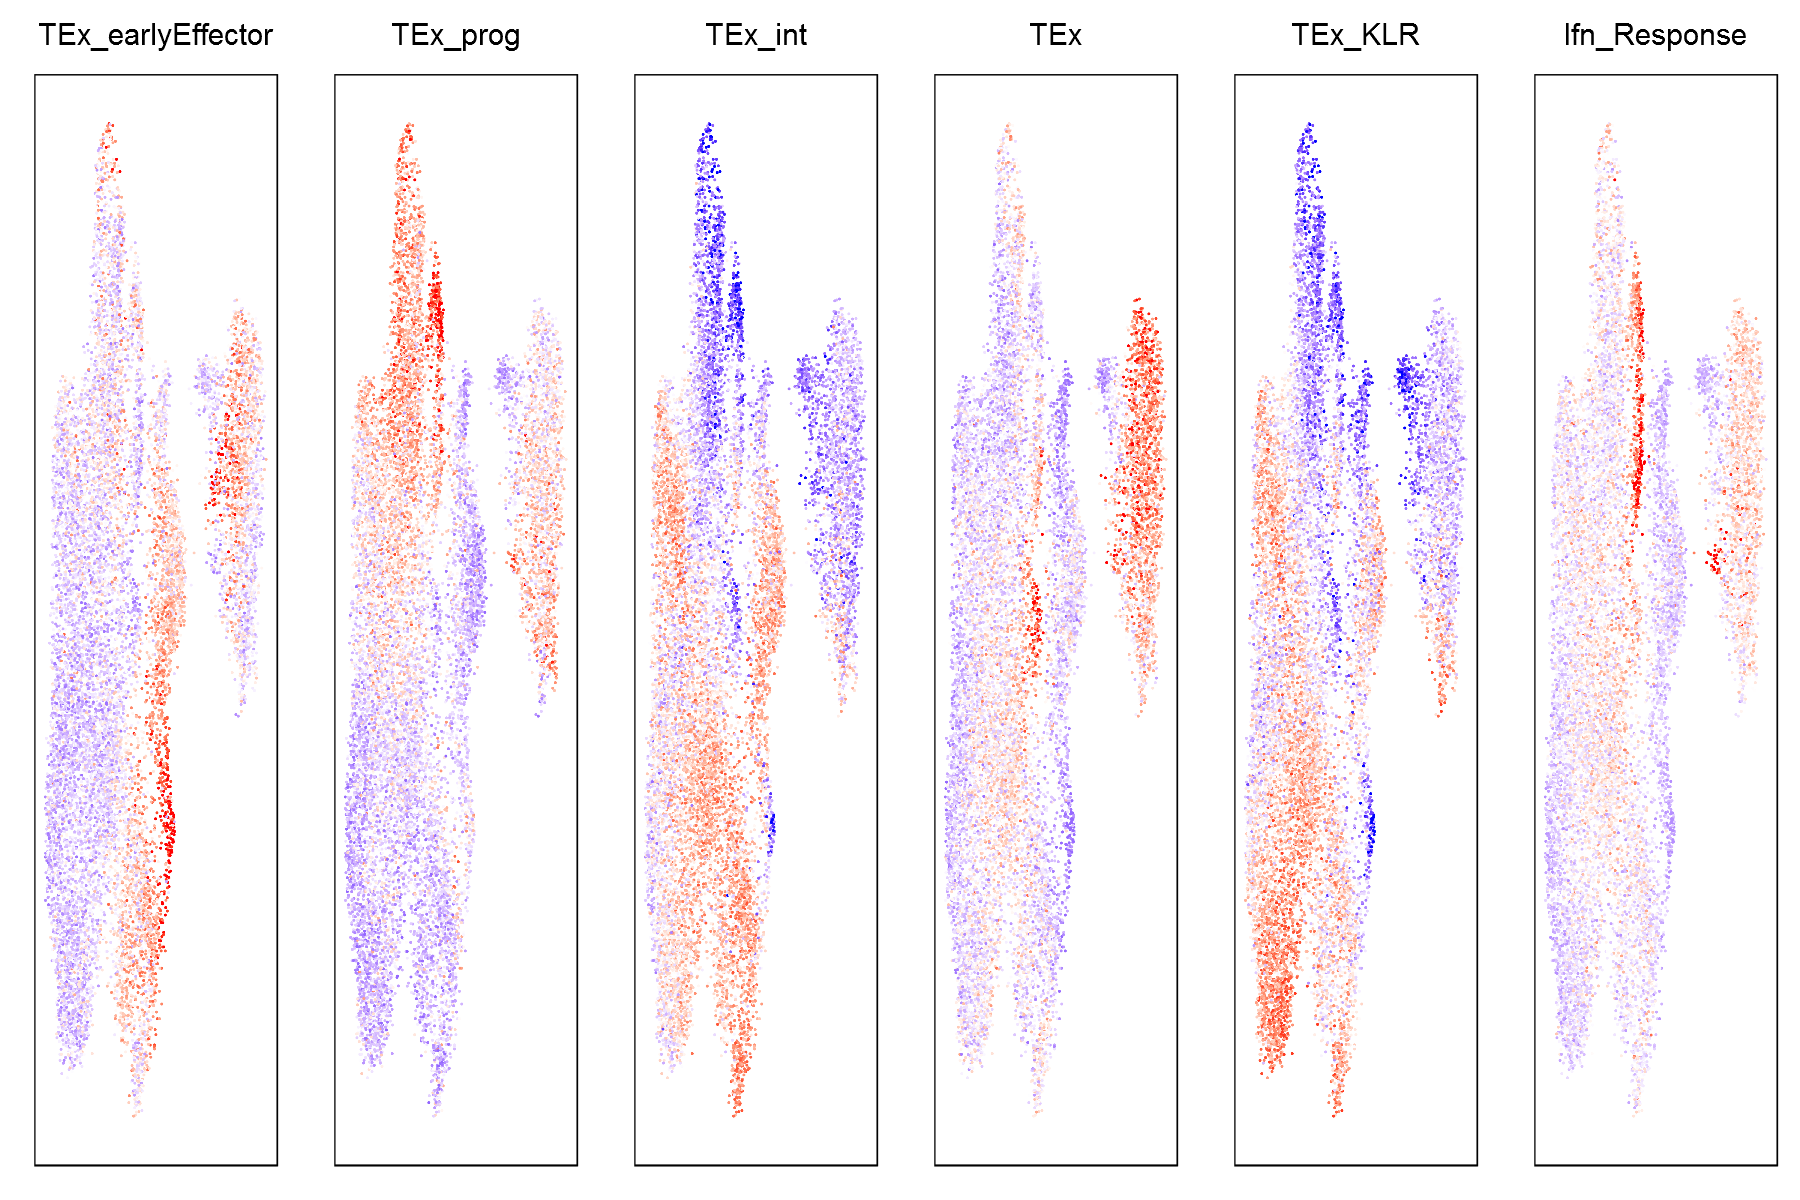

In [11]:
options(repr.plot.width = 8, repr.plot.height = 9, repr.plot.res = 300)
library(ggrastr)
plots = list()
for  (i in 1:6) {
    seurat$gene = seurat@meta.data[,paste0('Cluster', i)]
    seurat$gene[seurat$gene > quantile(seurat$gene, .99)] = quantile(seurat$gene, .99)
    seurat$gene[seurat$gene < quantile(seurat$gene, .01)] = quantile(seurat$gene, .01)
    seurat$gene = scale(seurat$gene)

    plots[[i]] =ggplot(seurat@meta.data, aes(x = UMAP1, y = UMAP2, color = gene)) + geom_point_rast(size = .3, stroke = 0, raster.dpi = 1000) + guides(color = FALSE) + UMAP_theme  +
    ggtitle(names(geneLists[i])) + 
    #scale_color_gradient(low = 'grey95', high = 'red')
    scale_color_gradient2(low = 'blue', mid = 'white', high = 'red')+
    theme(plot.title = element_text(size = 7), panel.background = element_rect(fill = NA, color = 'black', size  = .176))
}
options(repr.plot.width = 6, repr.plot.height = 4)
plot_1 = cowplot::plot_grid(plotlist = plots, ncol = 6)

plot_1
#ggsave('atlas/daniel.pdf', height = 1.2, width = 7, useDingbats = FALSE)

In [12]:

n = 50
names = c()
geneLists = list()
markers.giles = readRDS('L:/Duncan/literature data/Giles/giles_clusters.RDS')


clusters =  c('Exh-Pre', 'Exh-Prog', 'Exh-Int', 'Exh-Term',  'Exh-KLR', 'ISG')
for (each in clusters) {
    message(each)
    a = markers.giles %>% filter(cluster == each, avg_log2FC > 0, p_val_adj < .001)
    geneLists[[each]] = a$gene[1:n]
}
seurat = AddModuleScore(seurat, features = geneLists)

Exh-Pre

Exh-Prog

Exh-Int

Exh-Term

Exh-KLR

ISG

Warning message:
"The following features are not present in the object: Rack1, Gm42418, Gstp3, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Gm49359, Rack1, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Ripor2, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Adgrg1, AC163354.1, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Borcs7, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Ifit3b, Ifi209, Jaml, Ifi208, Ifi214, Ifit1bl1, Ifi213, not searching for symbol synonyms"


In [13]:
options(repr.plot.width = 8, repr.plot.height = 6)

plots = list()
for  (i in 1:6) {
    seurat$gene = seurat@meta.data[,paste0('Cluster', i)]
    seurat$gene[seurat$gene > quantile(seurat$gene, .99)] = quantile(seurat$gene, .99)
    seurat$gene[seurat$gene < quantile(seurat$gene, .01)] = quantile(seurat$gene, .01)
    seurat$gene = scale(seurat$gene)

    plots[[i]] =ggplot(seurat@meta.data, aes(x = UMAP1, y = UMAP2, color = gene)) + geom_point_rast(size = .3, stroke = 0, raster.dpi = 1000) + guides(color = FALSE) + UMAP_theme  +
    ggtitle(names(geneLists[i])) + 
    #scale_color_gradient(low = 'grey95', high = 'red')
    scale_color_gradient2(low = 'blue', mid = 'white', high = 'red')+
    theme(plot.title = element_text(size = 7), panel.background = element_rect(fill = NA, color = 'black', size  = .176))
}
options(repr.plot.width = 6, repr.plot.height = 2)
plot_2 = cowplot::plot_grid(plotlist = plots, ncol = 6)

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


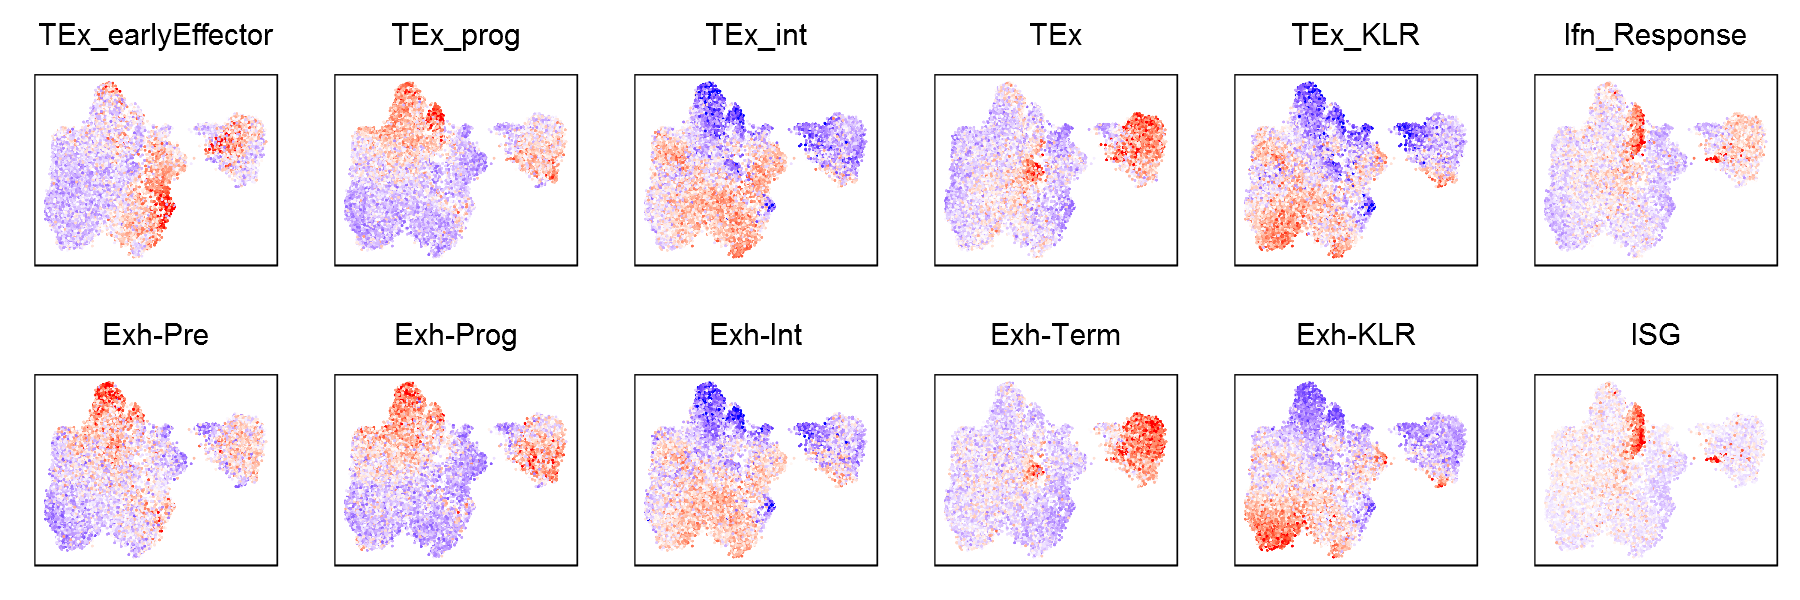

In [14]:
cowplot::plot_grid(plot_1, plot_2, ncol = 1)
#ggsave('Atlas/signatures.pdf', height = 2.4, width = 6.9, useDingbats = FALSE)

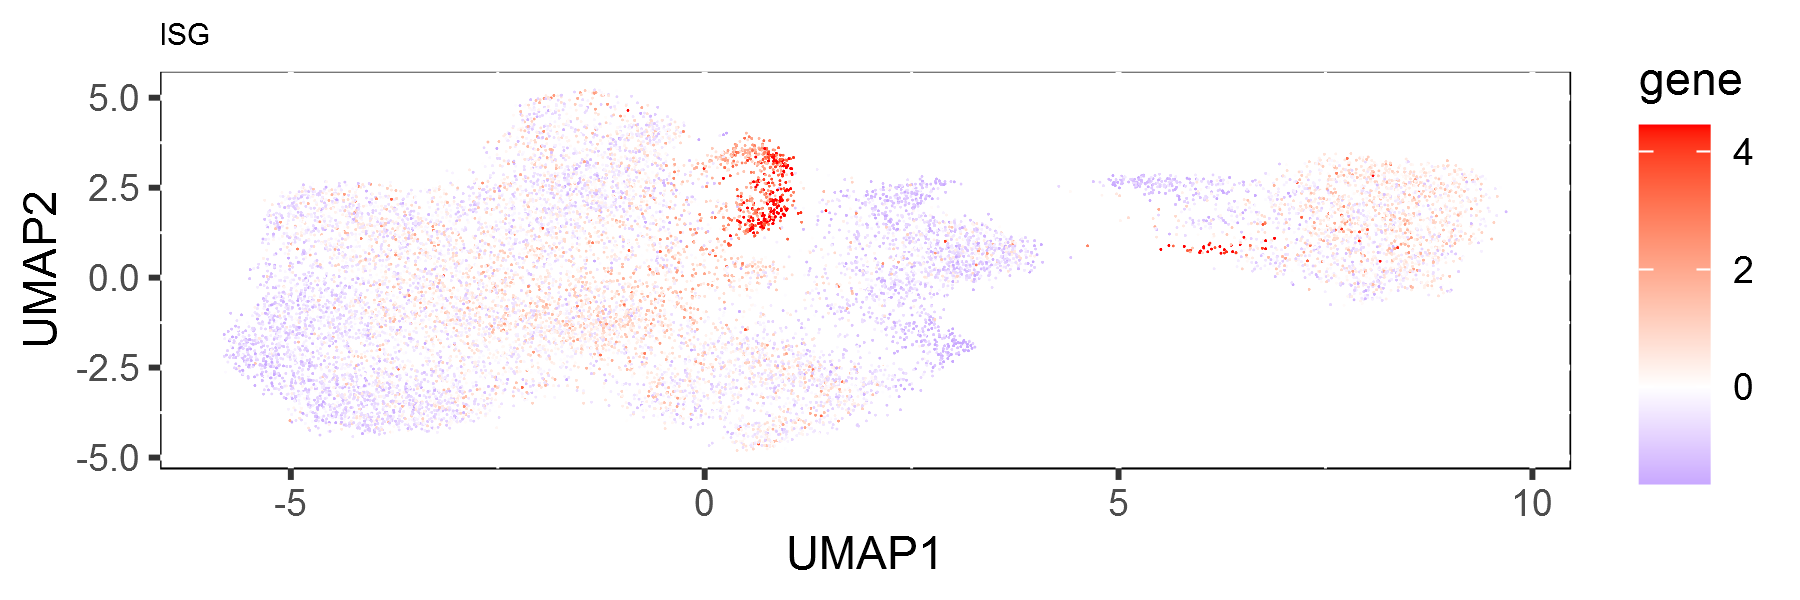

In [75]:
ggplot(seurat@meta.data, aes(x = UMAP1, y = UMAP2, color = gene)) + geom_point_rast(size = .3, stroke = 0, raster.dpi = 1000)   +
    ggtitle(names(geneLists[i])) + 
    #scale_color_gradient(low = 'grey95', high = 'red')
    scale_color_gradient2(low = 'blue', mid = 'white', high = 'red')+
    theme(plot.title = element_text(size = 7), panel.background = element_rect(fill = NA, color = 'black', size  = .176))
ggsave('atlas/featureplot_legend.pdf', height = 3, width = 3, useDingbats = FALSE)

In [27]:
library(pheatmap)
options(repr.plot.width = 6, repr.plot.height =2,repr.plot.res = 300 )
DefaultAssay(seurat) = 'integrated'

library(dplyr)

#genes = c('Ccl5', 'Ccr2', 'Itga4', 'Id2',"Cxcr3", 'Cd27', 'Ly6e', 'Lgals3', 'Gzmk', 'Tcf7', 'Sell', 'Rpl12', 'Id3', 'Il7r', 'Havcr2', 'Pdcd1', 'Ifng', 'Gzmb', 'Lag3', 
#         'Cx3cr1', 'Gzma', 'S1pr5', 'Zeb2', 'Klrg1' ,'Mki67', 'Cenpa', 'Mcm5', 'Cenpe', 'Lsp1','Itgae', 'Itgb1', 'Il18r1', 'Cxcr6', 'S1pr1', 'Hist1h1b', 'Hist1h3c', 'Tuba1b', 'Tubb5', 'Top2a', 
 #        'Ncl', 'Eif5a', 'Npm1', 'Hsp90ab1', 'Cct3',"Ifit1", 'Isg15', 'Stat1', 'Irf7', 'Oas3', 'Tox', 'Ccl3', 'Entpd1', 'Tigit', 'Ccl4')

genes = c(   'Ncl', 'Eif5a', 'Npm1', 'Hsp90ab1', 'Btg1',
          'Tcf7', 'Sell', 'Slamf6', 'Id3', 'Il7r',
          'Ccl5', 'Itgax', 'Ccr2', 'Itga4', "Cxcr3",
          'Itgae', 'Itgb1','Ccr10', 'Cxcr6', 'S1pr1',
          'Cd69', 'Pdcd1', 'Ctla4', 'Srgn', 'Lag3', 'Ccl3', 'Entpd1', 'Tigit', 'Ccl4', 'Tox' , 'Cx3cr1',
          'Gzma', 'S1pr5', 'Zeb2', 'Klrg1' ,
          "Ifit1", 'Isg15', 'Stat1', 'Irf7', 'Oas3',
          'Mki67', 'Cenpa', 'Mcm5', 'Cenpe',
          'Hist1h1b', 'Hist1h3c', 'Tuba1b', 'Tubb5', 'Top2a'
)

genes = genes[genes %in% rownames(GetAssayData(seurat))]
data = GetAssayData(seurat)[genes,] %>% as.matrix()  %>% t()%>% as.data.frame()
data$cluster =seurat$cluster_name
data$hash = seurat$hash
data$letter = seurat$class

data = data %>%  group_by(cluster, letter, hash) %>% summarize_all(.funs = mean)

plot_data  = data[,-c(1,2,3)]
plot_data = scale(plot_data)

rownames(plot_data)= paste0(data$cluster, data$letter, data$hash)

meta.data = data.frame(row.names = rownames(plot_data), cluster = data$cluster)
plot_data[plot_data < -1.5] = -1.5
plot_data[plot_data > 2] = 2

pheatmap(plot_data , cluster_rows = FALSE, cluster_cols = FALSE, annotation_row = meta.data, show_rownames = FALSE, annotation_colors = list(cluster = phenotype_palette), 
        fontsize = 6, border_color = NA, angle_col = 45, filename = 'Atlas/clusterheat.pdf', width = 7, height = 2)


         0          4 background 
        10         10      10019 

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"Removed 10019 rows containing missing values (geom_text_repel)."
Warning message:
"Removed 10019 rows containing missing values (geom_text_repel)."


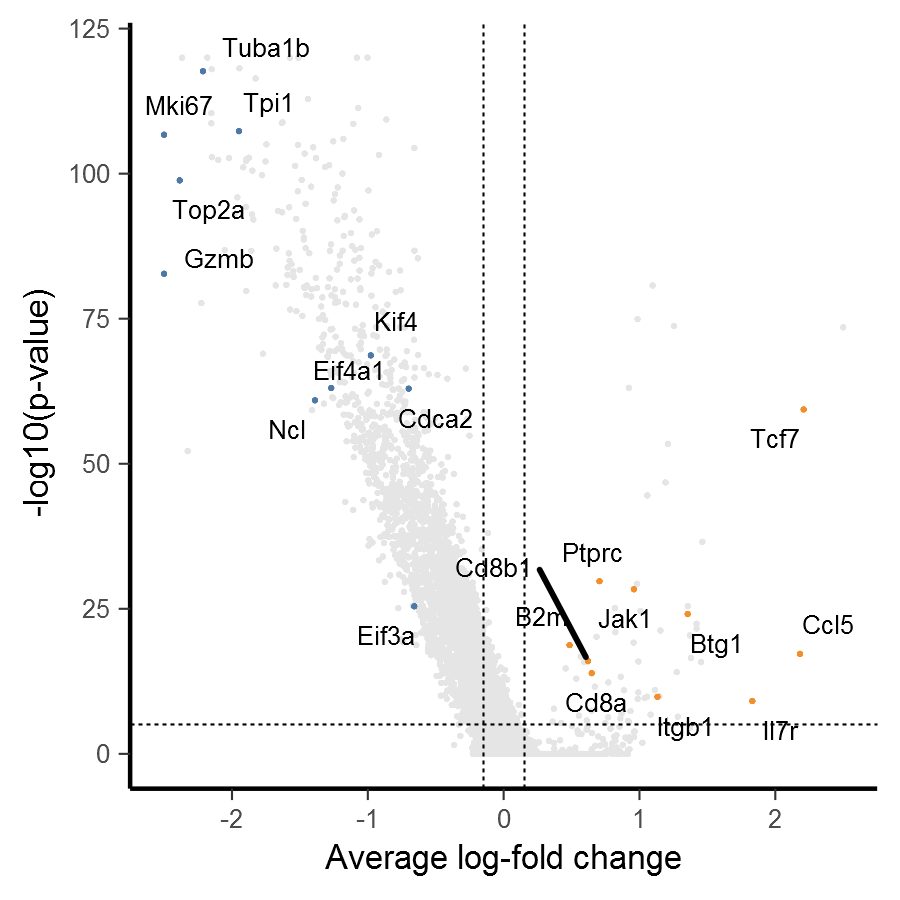

In [97]:
library(ggrepel)
library(stringr)
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res = 300)
DefaultAssay(seurat) = 'integrated'
Idents(seurat) = 'cluster_name'
#markers.pre = FindMarkers(seurat,'Progenitor','Pre-exhausted', logfc.threshold = 0)
markers.plot =c('Tcf7', 'Ptprc',  'Btg1', 'Cd8b1', 'Cd8a', 'Itgb1', 'Il7r','Tuba1b', 'Mki67', 'Tip1', 'Top2a', 'Gzmb',  'Kif4', 'Bcl', 'Jak1', "B2m", 'Ccl5', 'Ncl', 'Eif3a', 'Tpi1', "Eif4a1", 
               'Cdca2')

a = markers.pre
a$format_gene = str_to_title(rownames(a))
a$label = a$format_gene
a$label[!a$format_gene %in% markers.plot] = NA

a$avg_log2FC[a$avg_log2FC < -2.5] = -2.5
a$avg_log2FC[a$avg_log2FC > 2.5] = 2.5

a$color = 'background'
a$color[!is.na(a$label)] = '4'
a$color[!is.na(a$label) & (a$avg_log2FC < 0)] = '0'
a$p_val_plot = a$p_val_adj
a$p_val_plot[a$p_val_adj < 1e-120] = 1e-120

table(a$color)
a = a[order(!is.na(a$label)),]

ggplot(a, aes(x = avg_log2FC, y = -log10(p_val_plot), color = color)) + geom_point_rast(size = .7, raster.dpi = 1000, stroke = 0) + theme_classic() + Axis_themes + labs(x = 'Average log-fold change', y = '-log10(p-value)') + 
guides(color = FALSE) + geom_text_repel(aes(label = label), size = 2.11667, color = 'black') + scale_color_manual(values = c(unname(phenotype_palette[c( 'Pre-exhausted', 'Progenitor' )]), 'grey90')) + 
geom_hline(yintercept = 5, linetype = 'dashed', size = .177) + geom_vline(xintercept = .15, linetype = 'dashed', size = .177) + geom_vline(xintercept = -.15, linetype = 'dashed', size = .177) + 
theme(axis.line = element_line(size = .38), axis.ticks = element_line(size = .177))

#write.csv(markers.pre, 'pre_vs_progenitor.csv')
ggsave('atlas/pre_vs_progenitor.pdf', height = 2.3, width = 2, useDingbats = FALSE)


         0          4 background 
         9         10       9595 

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"Removed 9595 rows containing missing values (geom_text_repel)."
Warning message:
"Removed 9595 rows containing missing values (geom_text_repel)."


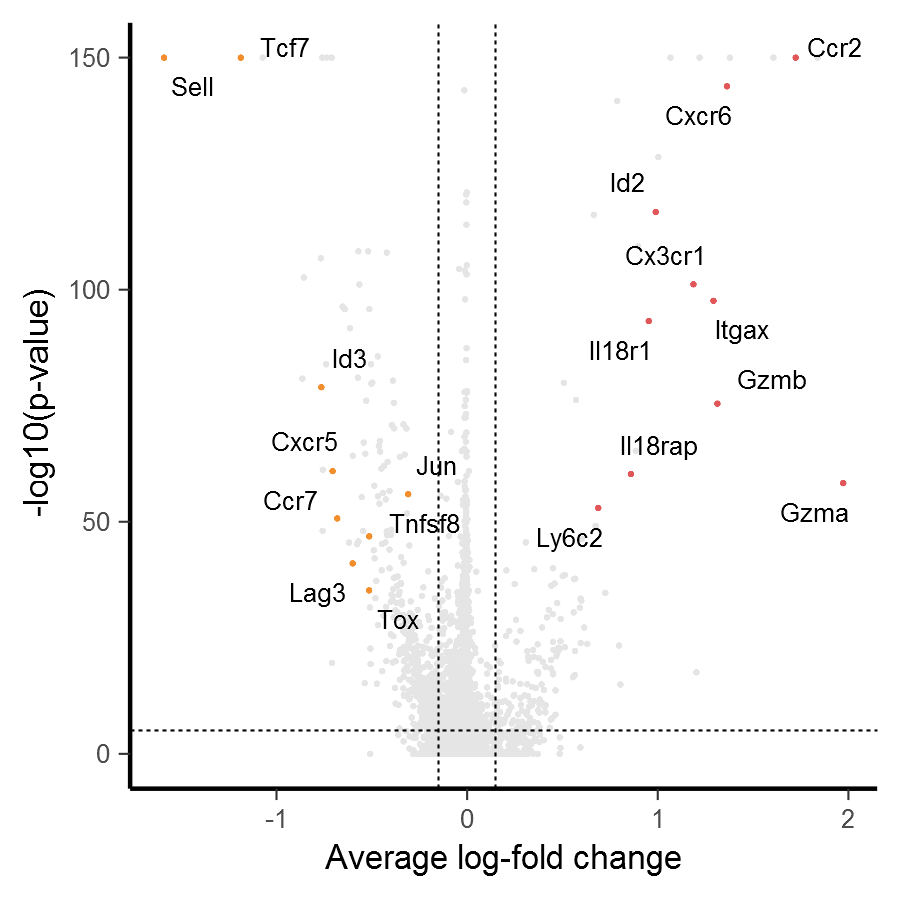

In [99]:
library(ggrepel)
library(stringr)
options(repr.plot.width = 3, repr.plot.height = 3)
DefaultAssay(seurat) = 'integrated'
Idents(seurat) = 'cluster_name'
#markers.proint = FindMarkers(seurat,c('Progenitor'), c('Intermediate_1', 'Intermediate_2'), logfc.threshold = 0)
markers.plot =c("Sell", 'Ccr2', 'Tcf7', 'Cxcr6', 'Id2', 'Itgax', 'Cx3cr1', 'Il18r1', 'Id3', 'Gzmb', 'Cxcr5', 'Il18rap', 'Gzma', 'Jun', 'Ly6c2', 'Ccr7', 'Tnfsf8', 'Lag3', 'Tox')
a = markers.proint
a$format_gene = str_to_title(rownames(a))
a$label = a$format_gene
a$label[!a$format_gene %in% markers.plot] = NA
a$avg_log2FC = -a$avg_log2FC
a$avg_log2FC[a$avg_log2FC < -2.5] = -2.5
a$avg_log2FC[a$avg_log2FC > 2.5] = 2.5

a$color = 'background'
a$color[!is.na(a$label)] = '4'
a$color[!is.na(a$label) & (a$avg_log2FC < 0)] = '0'
a$p_val_plot = a$p_val_adj
a$p_val_plot[a$p_val_adj < 1e-150] = 1e-150

table(a$color)
a = a[order(!is.na(a$label)),]

ggplot(a, aes(x = avg_log2FC, y = -log10(p_val_plot), color = color)) + geom_point_rast(size = .7, raster.dpi = 1000, stroke = 0) + theme_classic() + Axis_themes + labs(x = 'Average log-fold change', y = '-log10(p-value)') + 
guides(color = FALSE) + geom_text_repel(aes(label = label), size = 2.11667, color = 'black') + scale_color_manual(values = c(unname(phenotype_palette[c( 'Progenitor', 'Intermediate_1' )]), 'grey90')) + 
geom_hline(yintercept = 5, linetype = 'dashed', size = .177) + geom_vline(xintercept = .15, linetype = 'dashed', size = .177) + geom_vline(xintercept = -.15, linetype = 'dashed', size = .177) + 
theme(axis.line = element_line(size = .38), axis.ticks = element_line(size = .177))
ggsave('atlas/pro_vs_intermediate.pdf', height = 2.3, width = 2, useDingbats = FALSE)

#write.csv(markers.exh.1, 'exh1_vs_exh2.csv')



Warning message:
"package 'ggrastr' was built under R version 4.1.3"



         0          4 background 
         7         12       7751 

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"Removed 7751 rows containing missing values (geom_text_repel)."
Warning message:
"Removed 7751 rows containing missing values (geom_text_repel)."


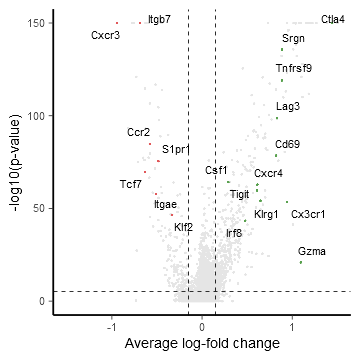

In [5]:
library(ggrepel)
library(ggrastr)
library(stringr)
options(repr.plot.width = 3, repr.plot.height = 3)
DefaultAssay(seurat) = 'integrated'
Idents(seurat) = 'cluster_name'
#markers.intexh = FindMarkers(seurat, c('Intermediate_1', 'Intermediate_2'), c('Exhausted_1', 'Exhausted_2', 'Exhausted_KLR'), logfc.threshold = 0)
markers.plot =c('Ctla4', 'Cxcr3',   'Srgn', 'Tnfrsf9',  'Lag3', 'Ccr2', 'Cd69', 'Tcf7', 'Csf1', 'Cxcr4', 'Tigit',  'Itgae', 'Klrg1', 'Gzma', 'Cx3cr1', 'Klf2',  'Irf8', 
               'Itgb7', 'S1pr1')
a = markers.intexh
a$format_gene = str_to_title(rownames(a))
a$label = a$format_gene
a$label[!a$format_gene %in% markers.plot] = NA
a$avg_log2FC = -a$avg_log2FC
a$avg_log2FC[a$avg_log2FC < -1.5] = -1.5
a$avg_log2FC[a$avg_log2FC > 1.5] = 1.5

a$color = 'background'
a$color[!is.na(a$label)] = '4'
a$color[!is.na(a$label) & (a$avg_log2FC < 0)] = '0'
a$p_val_plot = a$p_val_adj
a$p_val_plot[a$p_val_adj < 1e-150] = 1e-150

table(a$color)
a = a[order(!is.na(a$label)),]

ggplot(a, aes(x = avg_log2FC, y = -log10(p_val_plot), color = color)) + geom_point_rast(size = .7, raster.dpi = 1000, stroke = 0) + theme_classic() + Axis_themes + labs(x = 'Average log-fold change', y = '-log10(p-value)') + 
guides(color = FALSE) + geom_text_repel(aes(label = label), size = 2.11667, color = 'black') + scale_color_manual(values = c(unname(phenotype_palette[c( 'Intermediate_1', 'Exhausted_1' )]), 'grey90')) + 
geom_hline(yintercept = 5, linetype = 'dashed', size = .177) + geom_vline(xintercept = .15, linetype = 'dashed', size = .177) + geom_vline(xintercept = -.15, linetype = 'dashed', size = .177) + 
theme(axis.line = element_line(size = .38), axis.ticks = element_line(size = .177)) + scale_x_continuous(limits =c (-1.5, 1.5))

ggsave('atlas/int_vs_exh.pdf', height = 2.3, width = 2, useDingbats = FALSE)
#write.csv(markers.exh.1, 'exh1_vs_exh2.csv')




         0          4 background 
        11          7       8913 

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"Removed 8913 rows containing missing values (geom_text_repel)."
Warning message:
"Removed 8913 rows containing missing values (geom_text_repel)."


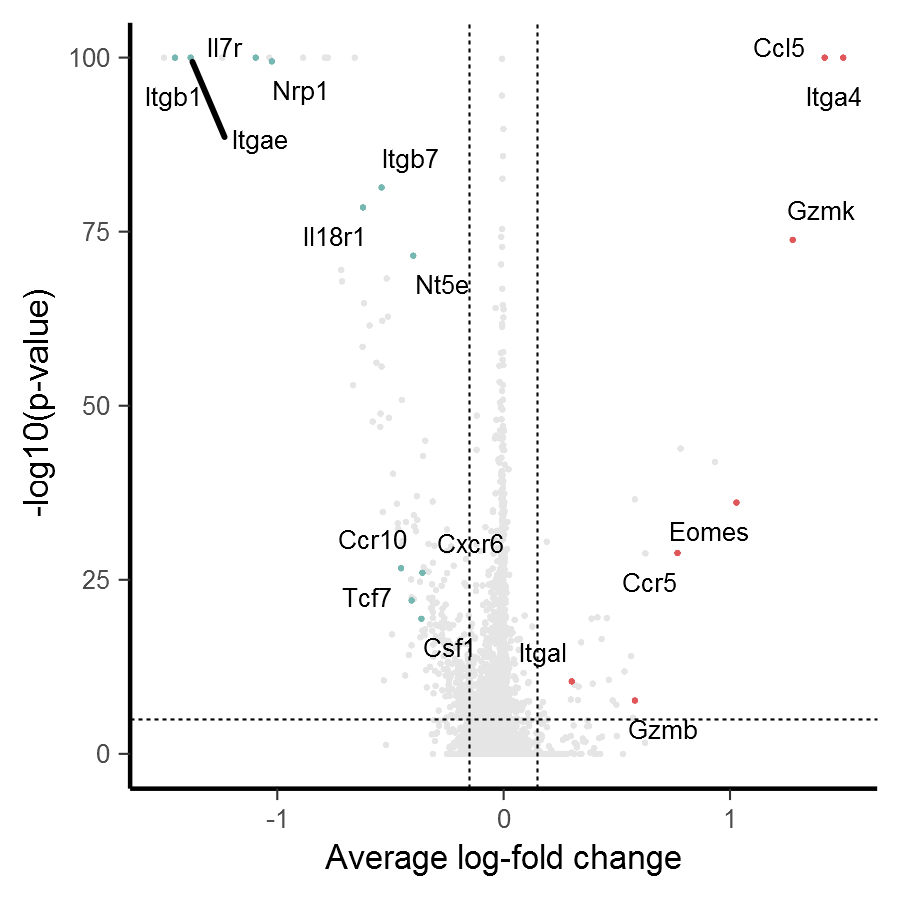

In [35]:
library(ggrepel)
library(stringr)
options(repr.plot.width = 3, repr.plot.height = 3)
DefaultAssay(seurat) = 'integrated'
Idents(seurat) = 'cluster_name'
#markers.intermediate = FindMarkers(seurat,'Intermediate_1','Intermediate_2', logfc.threshold = 0)
markers.plot =c('Ccl5',"Itgb1", 'Itga4', 'Itgae', 'Il7r', 'Nrp1', 'Itgb7', 'Il18r1', 'Gzmk', 'Nt5e', 'Eomes', 'Ccr5', 'Ccr10', 'Cxcr6', 'Il2tg', 'Tcf7', 'Csf1', 'Itgal', 'IL10ra', 'Gzmb')

a = markers.intermediate
a$format_gene = str_to_title(rownames(a))
a$label = a$format_gene
a$label[!a$format_gene %in% markers.plot] = NA

a$avg_log2FC[a$avg_log2FC < -1.5] = -1.5
a$avg_log2FC[a$avg_log2FC > 1.5] = 1.5

a$color = 'background'
a$color[!is.na(a$label)] = '4'
a$color[!is.na(a$label) & (a$avg_log2FC < 0)] = '0'
a$p_val_plot = a$p_val_adj
a$p_val_plot[a$p_val_adj < 1e-100] = 1e-100

table(a$color)
library(ggrastr)
ggplot(a %>% arrange(!is.na(label)), aes(x = avg_log2FC, y = -log10(p_val_plot), color = color)) + geom_point_rast(size = .7, raster.dpi = 1000, stroke = 0) + theme_classic() + Axis_themes + labs(x = 'Average log-fold change', y = '-log10(p-value)') + 
guides(color = FALSE) + geom_text_repel(aes(label = label), size = 2.11667, color = 'black') + scale_color_manual(values = c(unname(phenotype_palette[c( 'Intermediate_2', 'Intermediate_1' )]), 'grey90')) + 
geom_hline(yintercept = 5, linetype = 'dashed', size = .177) + geom_vline(xintercept = .15, linetype = 'dashed', size = .177) + geom_vline(xintercept = -.15, linetype = 'dashed', size = .177) + 
theme(axis.line = element_line(size = .38), axis.ticks = element_line(size = .177)) + scale_x_continuous(limits =c (-1.5, 1.5))

#write.csv(markers.intermediate, 'intermediate_1_vs_2.csv')
ggsave('atlas/int1vsint2.pdf', height = 2.3, width = 2, useDingbats = FALSE)


         0          4 background 
         9         15       8585 

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"Removed 8585 rows containing missing values (geom_text_repel)."
Warning message:
"Removed 8585 rows containing missing values (geom_text_repel)."


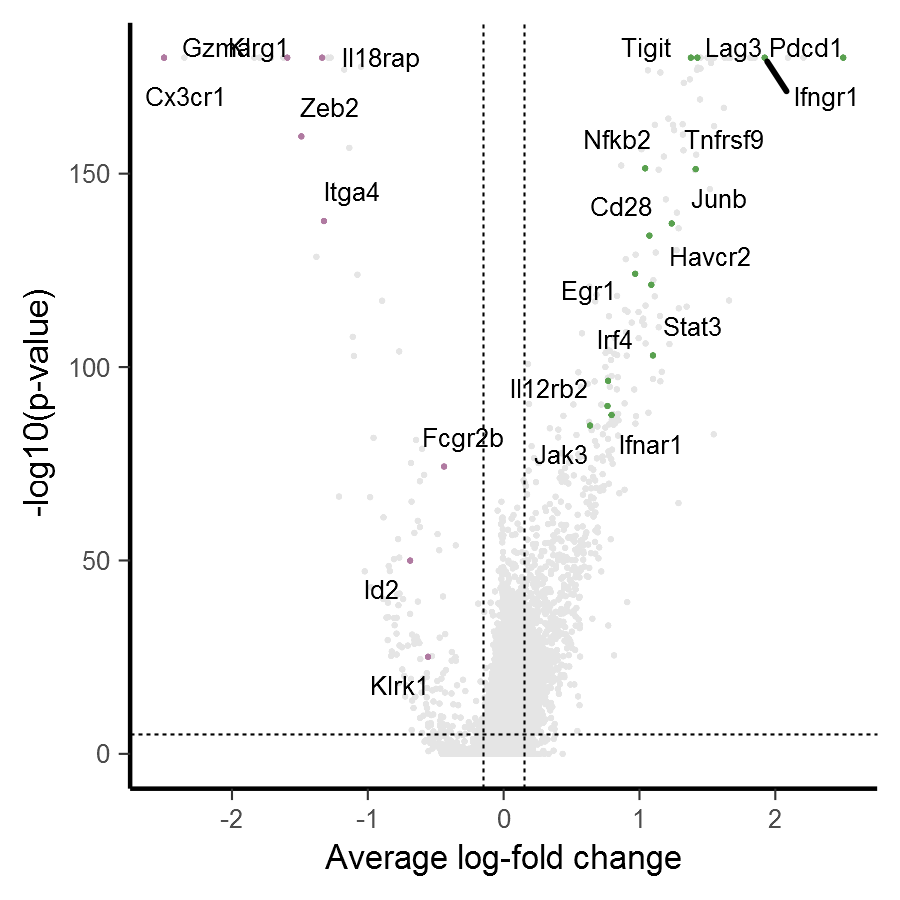

In [37]:
library(ggrepel)
library(stringr)
options(repr.plot.width = 3, repr.plot.height = 3)
DefaultAssay(seurat) = 'integrated'
Idents(seurat) = 'cluster_name'
#markers.exh = FindMarkers(seurat,'Exhausted_1','Exhausted_KLR', logfc.threshold = 0)
markers.plot =c('Cx3cr1', 'Gzma', 'Ifngr1', 'Pdcd1', 'Tigit', 'Klrg1', 'Lag3', 'Il18rap', 'Zeb2', 'Junb', 'Nfkb2', 'Tnfrsf9', 'Itga4', 'Cd28', 'Egr1', 'Havcr2', 
  'Stat3', 'Irf4', 'Il12rb2', 'Ifnar1', 'IL21r', 'Jak3', 'Id2', 'Klrk1', 'Fcgr2b',  'Ifngr' )
a = markers.exh
a$format_gene = str_to_title(rownames(a))
a$label = a$format_gene
a$label[!a$format_gene %in% markers.plot] = NA

a$avg_log2FC[a$avg_log2FC < -2.5] = -2.5
a$avg_log2FC[a$avg_log2FC > 2.5] = 2.5

a$color = 'background'
a$color[!is.na(a$label)] = '4'
a$color[!is.na(a$label) & (a$avg_log2FC < 0)] = '0'
a$p_val_plot = a$p_val_adj
a$p_val_plot[a$p_val_adj < 1e-180] = 1e-180

table(a$color)

ggplot(a %>% arrange(!is.na(label)), aes(x = avg_log2FC, y = -log10(p_val_plot), color = color)) + geom_point_rast(size = .7, raster.dpi = 1000, stroke = 0) + theme_classic() + Axis_themes + labs(x = 'Average log-fold change', y = '-log10(p-value)') + 
guides(color = FALSE) + geom_text_repel(aes(label = label), size = 2.11667, color = 'black') + scale_color_manual(values = c(unname(phenotype_palette[c( 'Exhausted_KLR', 'Exhausted_1' )]), 'grey90')) + 
geom_hline(yintercept = 5, linetype = 'dashed', size = .177) + geom_vline(xintercept = .15, linetype = 'dashed', size = .177) + geom_vline(xintercept = -.15, linetype = 'dashed', size = .177) + 
theme(axis.line = element_line(size = .38), axis.ticks = element_line(size = .177)) + scale_x_continuous(limits =c (-2.5, 2.5))


write.csv(markers.exh, 'exh1_vs_KLR.csv')

ggsave('atlas/exh1_klr.pdf', height = 2.3, width = 2, useDingbats = FALSE)


         0          4 background 
         6         14       7589 

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"Removed 7589 rows containing missing values (geom_text_repel)."
Warning message:
"Removed 7589 rows containing missing values (geom_text_repel)."


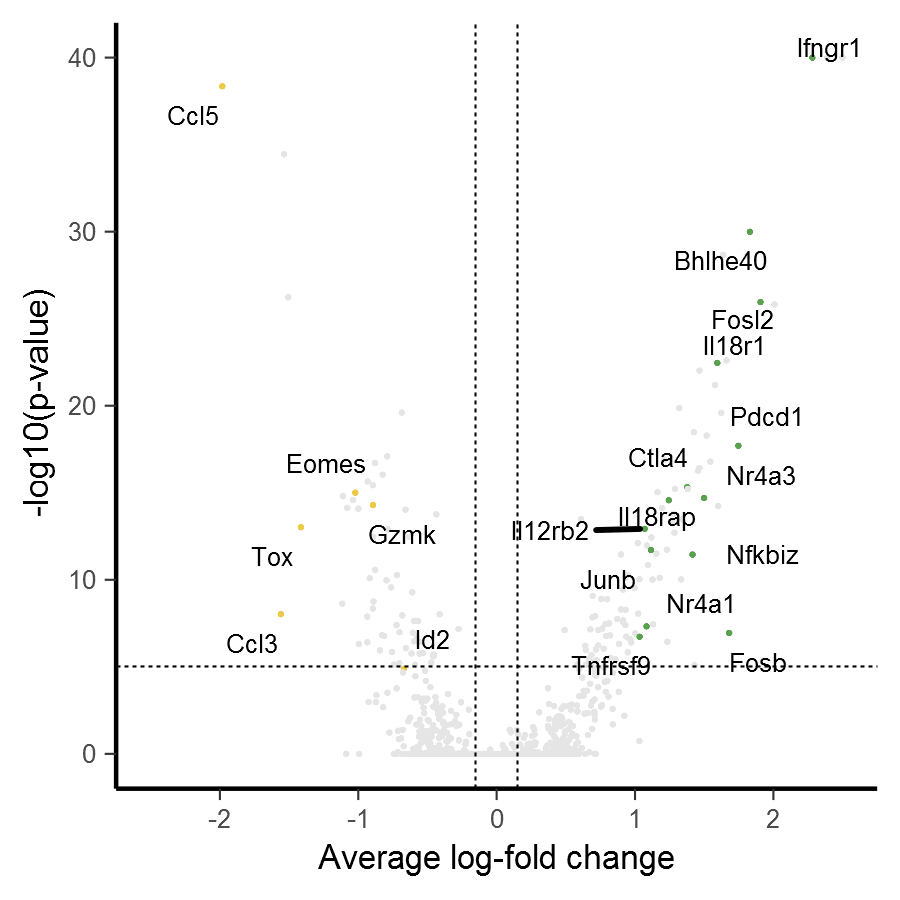

In [39]:
library(ggrepel)
library(stringr)
options(repr.plot.width = 3, repr.plot.height = 3)
DefaultAssay(seurat) = 'integrated'
Idents(seurat) = 'cluster_name'
#markers.exh.1 = FindMarkers(seurat,'Exhausted_1','Exhausted_2', logfc.threshold = 0)
markers.plot =c('Ifngr1', 'Fosl2', 'Bhlhe40', 'Pdcd1', 'Fosb', 'Il18r1', 'Nr4a3', 'Nfkbiz', 'Ctla4', 'Il18rap', 'Junb', 'Nr4a1', 'Il12rb2', 'Tnfrsf9',  'Ccl3', 'Ccl5', 'Tox',' Maf', 'Eomes', 'Gzmk', 'Id2')
a = markers.exh.1
a$format_gene = str_to_title(rownames(a))
a$label = a$format_gene
a$label[!a$format_gene %in% markers.plot] = NA

a$avg_log2FC[a$avg_log2FC < -2.5] = -2.5
a$avg_log2FC[a$avg_log2FC > 2.5] = 2.5

a$color = 'background'
a$color[!is.na(a$label)] = '4'
a$color[!is.na(a$label) & (a$avg_log2FC < 0)] = '0'
a$p_val_plot = a$p_val_adj
a$p_val_plot[a$p_val_adj < 1e-40] = 1e-40

table(a$color)
ggplot(a, aes(x = avg_log2FC, y = -log10(p_val_plot), color = color)) + geom_point_rast(size = .7, raster.dpi = 1000, stroke = 0) + theme_classic() + Axis_themes + labs(x = 'Average log-fold change', y = '-log10(p-value)') + 
guides(color = FALSE) + geom_text_repel(aes(label = label), size = 2.11667, color = 'black') + scale_color_manual(values = c(unname(phenotype_palette[c( 'Exhausted_2', 'Exhausted_1' )]), 'grey90')) + 
geom_hline(yintercept = 5, linetype = 'dashed', size = .177) + geom_vline(xintercept = .15, linetype = 'dashed', size = .177) + geom_vline(xintercept = -.15, linetype = 'dashed', size = .177) + 
theme(axis.line = element_line(size = .38), axis.ticks = element_line(size = .177)) + scale_x_continuous(limits =c (-2.5, 2.5))


#write.csv(markers.exh.1, 'exh1_vs_exh2.csv')

ggsave('atlas/exh1_exh2.pdf', height = 2.3, width = 2, useDingbats = FALSE)


         0          4 background 
        10          9       8403 

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"Removed 8403 rows containing missing values (geom_text_repel)."
Warning message:
"Removed 8403 rows containing missing values (geom_text_repel)."


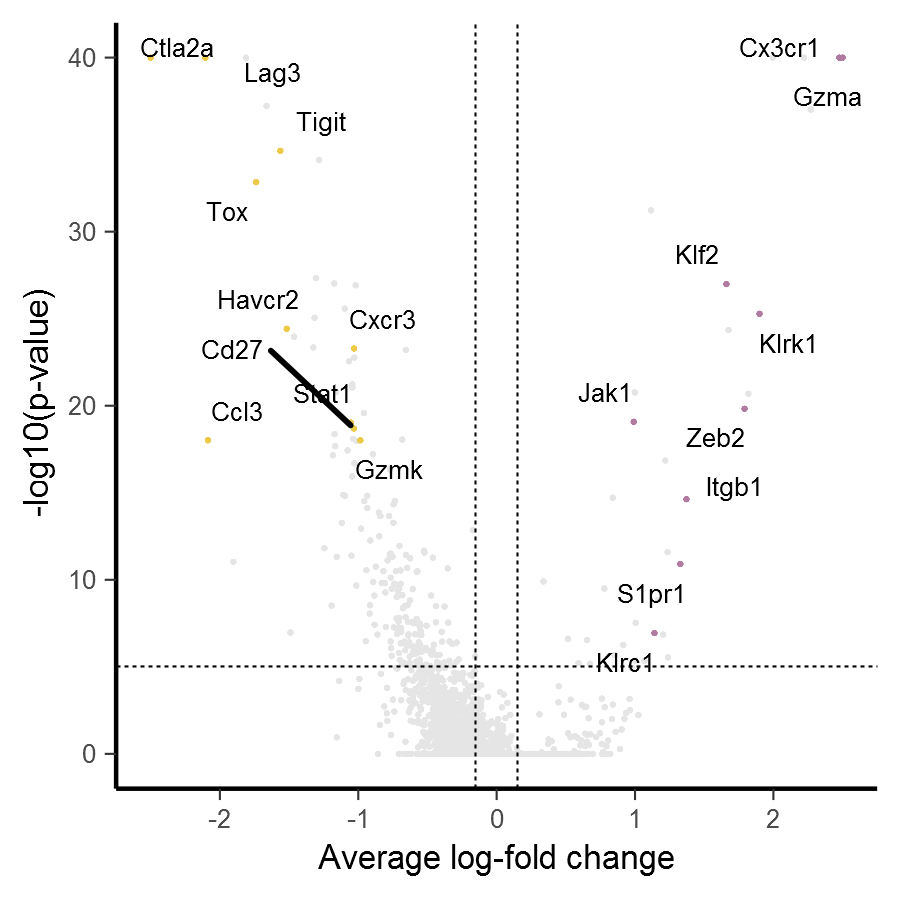

In [51]:
library(ggrepel)
library(stringr)
options(repr.plot.width = 3, repr.plot.height = 3)
DefaultAssay(seurat) = 'integrated'
Idents(seurat) = 'cluster_name'
#markers.exh.2 = FindMarkers(seurat,'Exhausted_KLR','Exhausted_2', logfc.threshold = 0)
markers.plot=  c('Lag3', 'Cx3cr1', 'Gzma', 'Ctla2a', 'Tox', 'Klf2',  'Klrk1', 'Havcr2', 'Cxcr3', 'IL18r1', 'Zeb2', 'Tigit', 'Ccl3', 'Gzmk', 'Stat1', 'Cd27',  'Jak1', 'Cd27', 'Itgb1', 'Klrc1', 'S1pr1')
a = markers.exh.2
a$format_gene = str_to_title(rownames(a))
a$label = a$format_gene
a$label[!a$format_gene %in% markers.plot] = NA

a$avg_log2FC[a$avg_log2FC < -2.5] = -2.5
a$avg_log2FC[a$avg_log2FC > 2.5] = 2.5

a$color = 'background'
a$color[!is.na(a$label)] = '4'
a$color[!is.na(a$label) & (a$avg_log2FC < 0)] = '0'
a$p_val_plot = a$p_val_adj
a$p_val_plot[a$p_val_adj < 1e-40] = 1e-40

table(a$color)
ggplot(a %>% arrange(!is.na(label)), aes(x = avg_log2FC, y = -log10(p_val_plot), color = color)) + geom_point_rast(size = .7, raster.dpi = 1000, stroke = 0) + theme_classic() + Axis_themes + labs(x = 'Average log-fold change', y = '-log10(p-value)') + 
guides(color = FALSE) + geom_text_repel(aes(label = label), size = 2.11667, color = 'black') + scale_color_manual(values = c(unname(phenotype_palette[c( 'Exhausted_2', 'Exhausted_KLR' )]), 'grey90')) + 
geom_hline(yintercept = 5, linetype = 'dashed', size = .177) + geom_vline(xintercept = .15, linetype = 'dashed', size = .177) + geom_vline(xintercept = -.15, linetype = 'dashed', size = .177) + 
theme(axis.line = element_line(size = .38), axis.ticks = element_line(size = .177)) + scale_x_continuous(limits =c (-2.5, 2.5))


#write.csv(markers.exh.1, 'exh1_vs_exh2.csv')

ggsave('atlas/exh2_exhklr.pdf', height = 2.3, width = 2, useDingbats = FALSE)


         0          4 background 
         6         16       8753 

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message:
"Removed 8753 rows containing missing values (geom_text_repel)."
Warning message:
"Removed 8753 rows containing missing values (geom_text_repel)."
Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


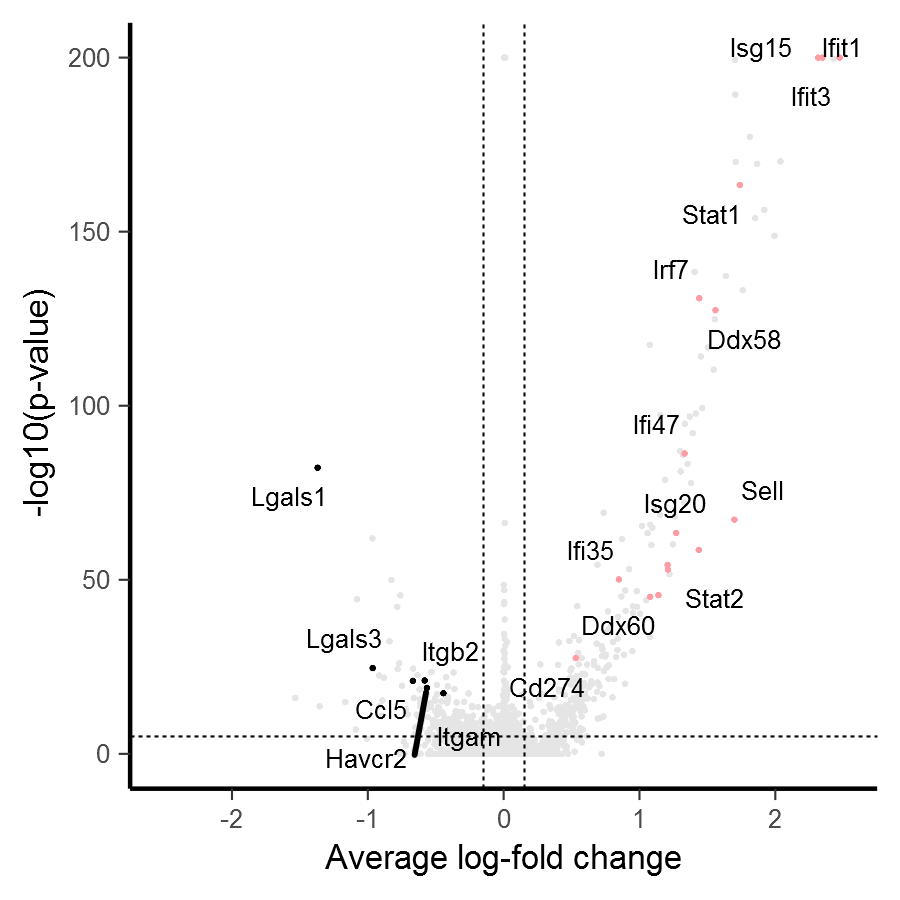

In [59]:
library(ggrepel)
library(stringr)
options(repr.plot.width = 3, repr.plot.height = 3)
DefaultAssay(seurat) = 'integrated'
Idents(seurat) = 'cluster_name'
#markers.ifn = FindMarkers(seurat, 'IFN-responsive', logfc.threshold = 0)
markers.plot= c('Ifit1', 'Ifit3', 'Isg15', 'Stat1', 'Irf7', 'Ddx58', 'Ifi47', 'Sell', 'Isg20', 'Gbp2', 'Gbp7', 'Ifit2', 'Ifi35', 'Stat2', 'Ddx60', 'Cd274', 'Lgals1', 'Lgals3', 'Ccl5', 'Itgb2', 'Itgam', 'Havcr2')
a = markers.ifn
a$format_gene = str_to_title(rownames(a))
a$label = a$format_gene
a$label[!a$format_gene %in% markers.plot] = NA

a$avg_log2FC[a$avg_log2FC < -2.5] = -2.5
a$avg_log2FC[a$avg_log2FC > 2.5] = 2.5

a$color = 'background'
a$color[!is.na(a$label)] = '4'
a$color[!is.na(a$label) & (a$avg_log2FC < 0)] = '0'
a$p_val_plot = a$p_val_adj
a$p_val_plot[a$p_val_adj < 1e-200] = 1e-200

table(a$color)
ggplot(a %>% arrange(!is.na(label)), aes(x = avg_log2FC, y = -log10(p_val_plot), color = color)) + geom_point_rast(size = .7, raster.dpi = 1000, stroke = 0) + theme_classic() + Axis_themes + labs(x = 'Average log-fold change', y = '-log10(p-value)') + 
guides(color = FALSE) + geom_text_repel(aes(label = label), size = 2.11667, color = 'black') + scale_color_manual(values = c('black', unname(phenotype_palette[c('IFN-responsive' )]), 'grey90')) + 
geom_hline(yintercept = 5, linetype = 'dashed', size = .177) + geom_vline(xintercept = .15, linetype = 'dashed', size = .177) + geom_vline(xintercept = -.15, linetype = 'dashed', size = .177) + 
theme(axis.line = element_line(size = .38), axis.ticks = element_line(size = .177)) + scale_x_continuous(limits =c (-2.5, 2.5))


#write.csv(markers.exh.1, 'exh1_vs_exh2.csv')

ggsave('atlas/ifn.pdf', height = 2.3, width = 2, useDingbats = FALSE)

In [56]:
markers.ifn %>% filter(avg_log2FC < 0) %>% head(60)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Lgals1,3.673207e-87,-1.3695675935,0.661,0.906,6.325263e-83
Ahnak,7.364735e-67,-0.9662145956,0.757,0.951,1.268207e-62
Spn,6.871067e-55,-0.8263037106,0.793,0.914,1.183198e-50
Ctsd,1.727319e-50,-0.7602792837,0.735,0.880,2.974443e-46
Vim,2.184228e-49,-1.0808566467,0.629,0.828,3.761241e-45
S100a10,3.287115e-47,-0.7830040312,0.721,0.886,5.660413e-43
S100a4,2.779367e-37,-0.8409285427,0.512,0.771,4.786070e-33
Gm24018,1.321292e-34,-0.0002984405,0.108,0.020,2.275264e-30
Crip1,5.473391e-31,-0.7688426346,0.643,0.794,9.425179e-27


In [243]:
Idents(seurat) = 'cluster_name'
query = subset(seurat,cells = colnames(seurat)[Idents(seurat) %in% c('Proliferating_1', 'Proliferating_2')])
reference =  subset(seurat,cells = colnames(seurat)[!Idents(seurat) %in% c('Proliferating_1', 'Proliferating_2')])

In [244]:
anchors = FindTransferAnchors(reference = reference, query = query, dims = 1:50)
predictions = TransferData(anchorset = anchors, refdata = reference@meta.data[,'cluster_name'])

seurat$label = seurat@meta.data[,'cluster_name']
seurat@meta.data[rownames(predictions), 'label'] = predictions$predicted.id

Warning message:
"npcs is smaller than the largest value requested by the dims parameter.
Setting npcs to 50 and continuing."
Performing PCA on the provided reference using 2000 features as input.

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 1678 anchors

Filtering anchors

	Retained 1007 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


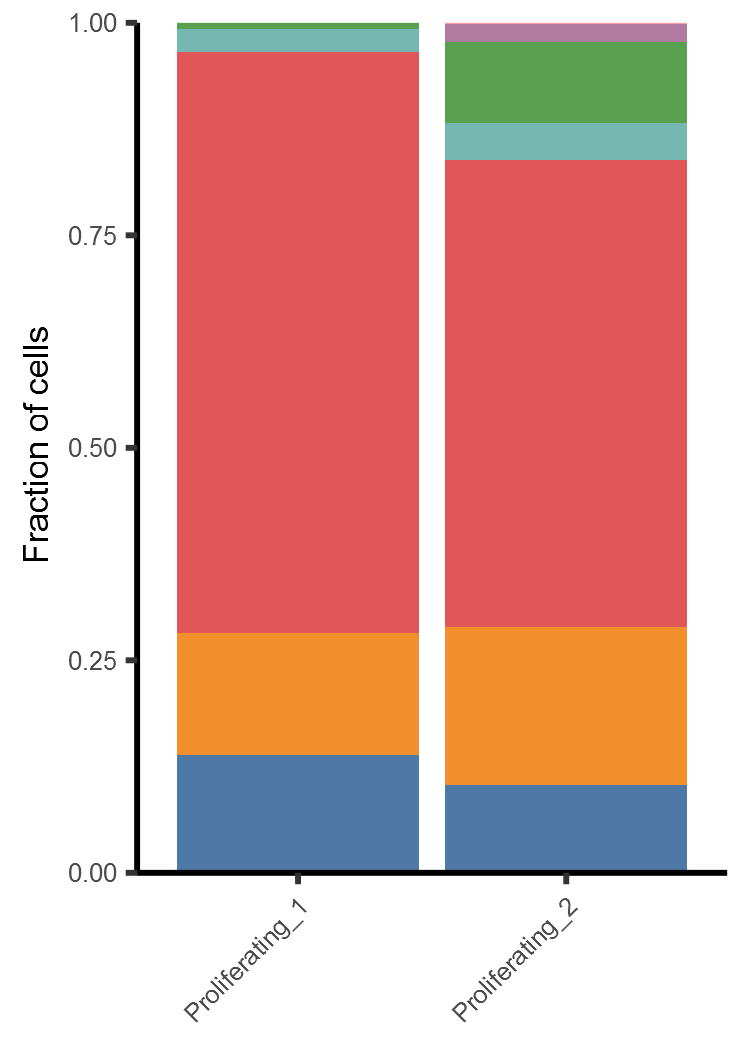

In [146]:
predictions$orig = seurat@meta.data[rownames(predictions), 'cluster_name']
ggplot(predictions, aes( x = orig,fill = factor(predicted.id, levels = rev(levels(seurat$cluster_name))))) + geom_bar(position= 'fill') + scale_fill_manual(values = phenotype_palette) + theme_classic() +  Axis_themes + 
labs( x= c(), y ='Fraction of cells', fill = 'Predicted\nphenotype') + theme(axis.text.x = element_text(angle = 45, hjust =1 )) + scale_y_continuous(expand = c(0,0)) +
theme(legend.key.size = unit(3, 'mm')) + guides(fill = FALSE)

ggsave('Atlas/label_transfer.pdf', height = 2.4, width = 0.8, useDingbats = FALSE)


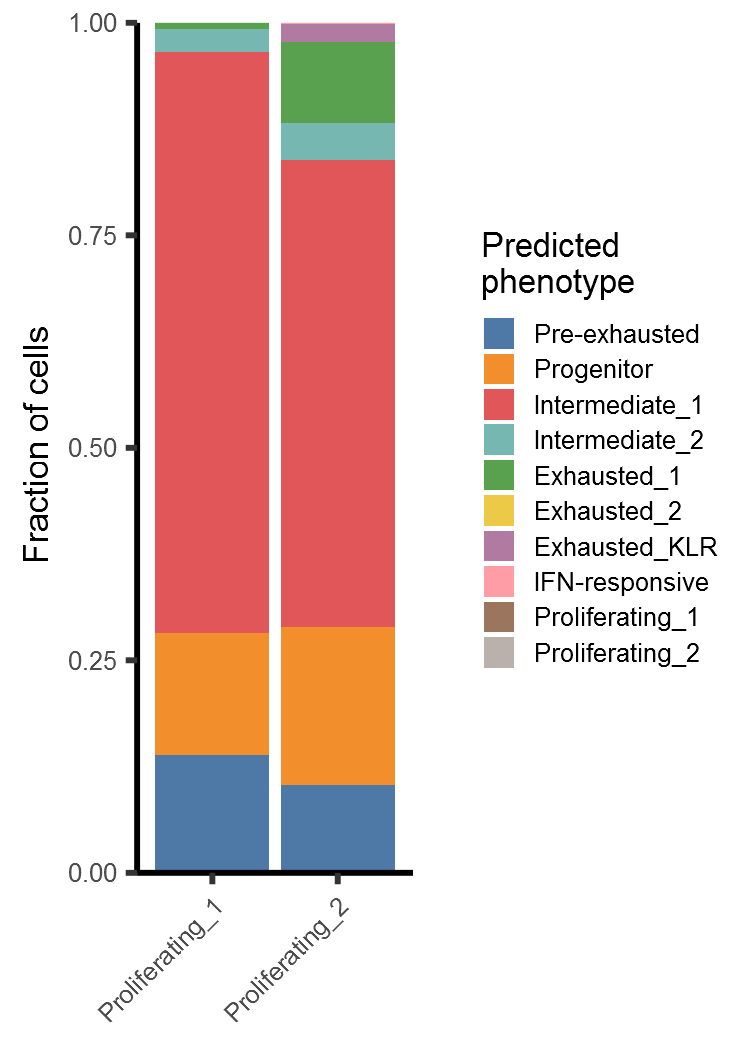

In [143]:
options(repr.plot.width = 2.5, repr.plot.height = 3.5)
predictions$orig = seurat@meta.data[rownames(predictions), 'cluster_name']
ggplot(predictions, aes( x = orig,fill = factor(predicted.id, levels = rev(levels(seurat$cluster_name))))) + geom_bar(position= 'fill') + scale_fill_manual(values = phenotype_palette) + theme_classic() +  Axis_themes + 
labs( x= c(), y ='Fraction of cells', fill = 'Predicted\nphenotype') + theme(axis.text.x = element_text(angle = 45, hjust =1 )) + scale_y_continuous(expand = c(0,0)) +
theme(legend.key.size = unit(3, 'mm')) 

ggsave('Atlas/label_transfer_legend.pdf', height = 2, width = 1.6, useDingbats = FALSE)


In [147]:
save.image('atlas_figure.RDATA')

In [60]:
save.image('atlas_20230203.RDATA')

In [1]:
load('atlas_figure.RDATA')